# TASK-2 Prediction Using Supervised ML

#### Author: Shubhang Shukla

## Model Used: Simple Linear Regression
In this task I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied using simple linear regression as it involves just two variables. We will perform Linear Regression both manually as well as using the SciKit-Learn library in Python

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data set from the given url
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [4]:
df.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [5]:
# checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
# Univariate analysis 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

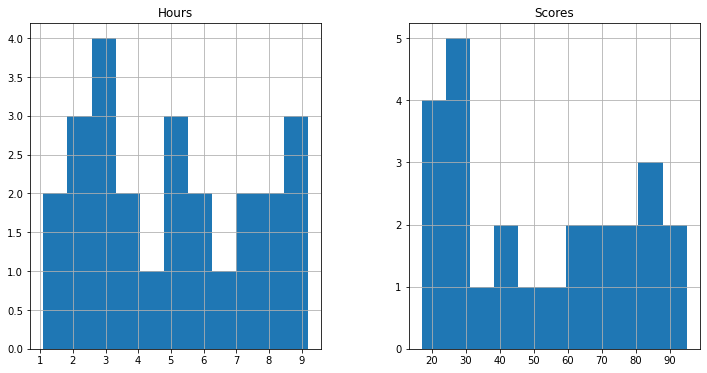

In [7]:
df.hist(figsize = (12,6), bins = 11)

Hours        AxesSubplot(0.125,0.125;0.352273x0.755)
Scores    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

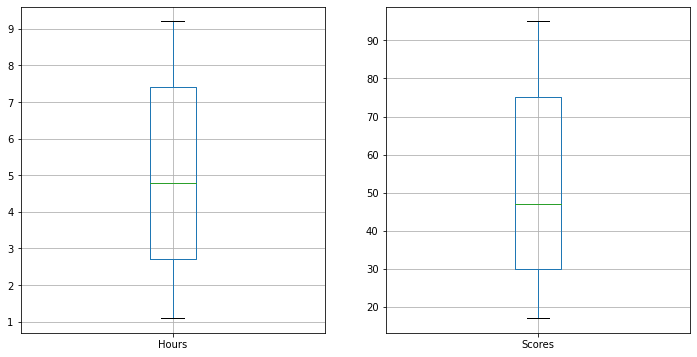

In [8]:
df.plot(grid = True, kind = 'box', subplots = True, figsize = (12,6))

### Check the Correlation between the Data

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

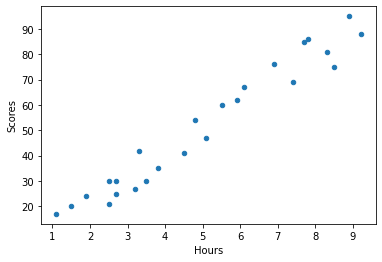

In [9]:
df.plot(x = 'Hours', y = 'Scores', kind = 'scatter')

In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term.

In [10]:
rows = df['Hours'].shape
#print(rows)
df['Ones'] = np.ones(rows)
df.head()

,Hours,Scores,Ones
0,2.5,21,1.0
1,5.1,47,1.0
2,3.2,27,1.0
3,8.5,75,1.0
4,3.5,30,1.0


In [11]:
X0 = df[['Ones', 'Hours']]
X = np.array(X0)
#X 

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

In [12]:
y0 = df[['Scores']]
y = np.array(y0)
#y

## Regression Without SciKit Learn
<a id="section2"></a>
####  Computing the cost $J(\theta)$

In this section we will compute the cost function $J(\theta)$, to monitor the change in the mean squared errors with thechange in parameter theta and check the convergence of the gradient descent implementation.To do this we will define a function to calculate $J(\theta)$.  

Remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [13]:
def costfunction(X,y,theta):
     
    """
    Compute cost function for linear regression. Theta are used as the
    parameters for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m, n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    ------------
    Compute the cost for a particular choice of theta and set J to the cost.
    
    """
    # initialize some useful values
    
    m = y.size  # number of training examples
    
    # the following variable needs to be returned correctly
    J = 0
    # ===========================================
    predictions = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(predictions - y))
    # ===========================================
    return J

In [14]:
# Input any values of theta to find out the values of cost function
A = 0
B = 1
J = costfunction(X, y, theta=np.array([A, B]))
J

34740.570999999996

<a id="section2"></a>
### Gradient Descent
In this part, we will fit the linear regression parameters $\theta$ to our dataset using gradient descent in order to minimize the cost function $J(\theta)$ calculated above.
#### Update Equations
The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).
#### Implementation
We have already set up the data for linear regression and also defined the Cost Function. In the following cell we will define a function to calculate the gradient descent.

In [15]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking 'num_iters' gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m, n+1).
        X = (25,2)
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Method:
    ------------
    Peform a single gradient step on the parameter vector theta. While debugging, it is useful to print out the values of 
    the cost function (computeCost) and gradient.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # =====================================================
        predictions = np.dot(X,theta)
        # print(predictions.shape)
        predictions = predictions.reshape(25,1)
        
        theta = theta - (1/m)*alpha*(X.T.dot(predictions - y))
        # ======================================================
    
        # save the cost J in every iteration
    J_history.append(costfunction(X, y, theta))
    
    return theta, J_history

In [16]:
A = 0
B = 1
theta = np.array([A,B]) 
theta = theta.reshape(2,1)
# some gradient descent settings
num_iters = 300
alpha = 0.01

#theta, J_history = gradientDescent(X ,y, theta, alpha, num_iters)
#print(theta)
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
print('The optimized values of parameter theta_0 =', theta[0], 'and theta_1 = ', theta[1])
print('The minimum value of cost function corresponding to optimized theta is', J_history)

The optimized values of parameter theta_0 = [1.8975687] and theta_1 =  [9.87041003]
The minimum value of cost function corresponding to optimized theta is [14.475023113926365]


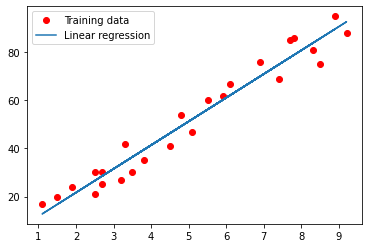

In [17]:
plt.plot(df.Hours, df.Scores, 'ro')
plt.plot(X[:,1],np.dot(X,theta))
plt.legend(['Training data', 'Linear regression']);

### Making Predictions

In [63]:
n_hours = 7.6
line = 
predicted_val = 

## Regression Using SciKit-Learn

In [18]:
df1 = df.drop('Ones', axis = 1)
df1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [19]:
X1 = df1.Hours.values
y1 = df1.Scores.values
#print(X1,y1)
X1 = X1.reshape(25,1)
y1 = y1.reshape(25,1)

In [20]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0) 
#print(X_train, y_train)
print('The given attributes and label columns have been split into a training set and a testing set')

The given attributes and label columns have been split into a training set and a testing set


In [21]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


In [22]:
print('The value of the intercept or theta_0 =', regressor.intercept_)
print('The regression coefficient or theta_1 =', regressor.coef_)

The value of the intercept or theta_0 = [2.01816004]
The regression coefficient or theta_1 = [[9.91065648]]


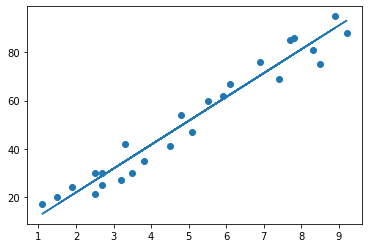

In [23]:
# Plotting the regression line
line = regressor.coef_*X1 + regressor.intercept_
# plotting the test data
plt.scatter(X1,y1)
plt.plot(X1,line)
plt.show()

In [47]:
y_pred = regressor.predict(X_test)

In [55]:
y_test.shape

(5, 1)

In [59]:
y_test = y_test.reshape(5,)
print(y_test.shape)

(5,)


In [60]:
y_pred = y_pred.reshape(5,)
print(y_pred.shape)

(5,)


In [62]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033
